# Statistics (Part 3): 

In [1]:
# Import useful python modules

%matplotlib notebook
import numpy as np 
import scipy.stats as sts
import scipy.linalg as LA
import matplotlib.pyplot as plt

# Demo 1: correlation coefficients

In [2]:
# Load age-depth data from sediment core

agedepth = np.loadtxt('agedepth.txt')

depth = agedepth[:,0]
age = agedepth[:,1]

<IPython.core.display.Javascript object>


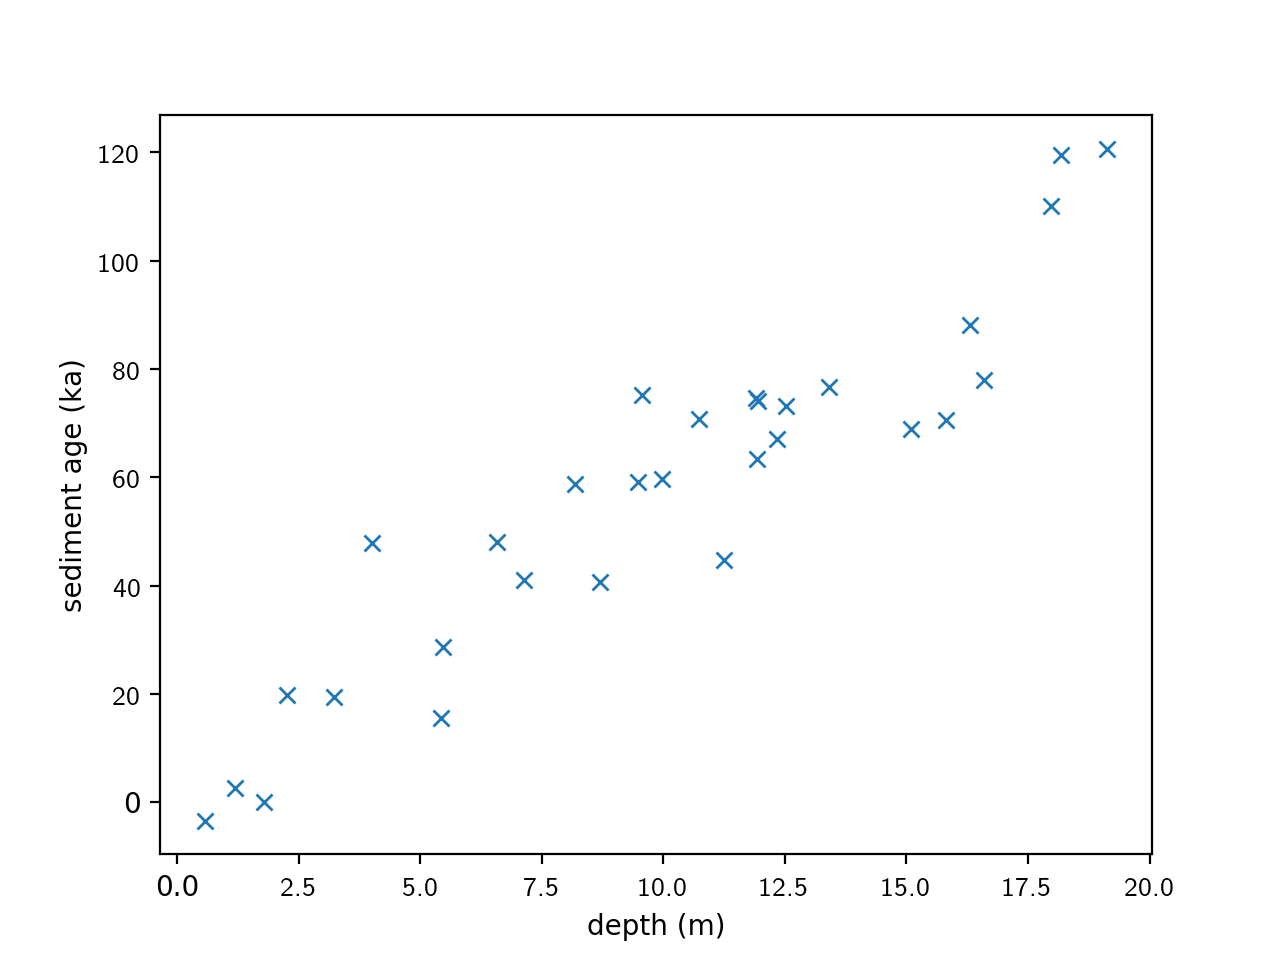

In [3]:
# Plot age-depth data as individual points, label figure

plt.plot(depth,age,'x')
plt.xlabel('depth (m)')
plt.ylabel('sediment age (ka)');

In [4]:
# Calculate and store mean depth and mean age

dmean = np.mean(depth)
amean = np.mean(age)

print(dmean)
print(amean)

9.954359841999999
57.134176817343345


In [5]:
# Calculate and store standard deviations of depth and age. Note python's default DOF = 0!

dstd = np.std(depth)
astd = np.std(age)

print(dstd)
print(astd)

# np.std?

# Signature: np.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
# Docstring: Compute the standard deviation along the specified axis.
#
# ddof : int, optional
# Means Delta Degrees of Freedom.  The divisor used in calculations
# is ``N - ddof``, where ``N`` represents the number of elements.
# By default `ddof` is zero.

5.2770859484022585
31.85603902190918


In [6]:
# Now let's specify the DOF explicitly as 1, for consistency with the course notes: 

dstd = np.std(depth,ddof=1)
astd = np.std(age,ddof=1)

print('')
print(dstd)
print(astd)


5.367299080622674
32.40062614601549


In [7]:
# Assign N as length of age vector

N = age.shape[0]
print(N)

30


In [8]:
# Compute and print the correlation coefficient between depth and age using equation from the notes

r_da = (1/(N-1))*(1/dstd)*(1/astd)*np.sum( (depth - dmean)*(age - amean) ) 
print(r_da)

0.9341735768636008


In [9]:
# Compute (Pearson) correlation coefficient using numpy function 'corrcoef'
# np.corrcoef?

np.corrcoef(age,depth)

array([[1.        , 0.93417358],
       [0.93417358, 1.        ]])

In [10]:
# Note that when we use np.std with default arguments (DOFs=0), r_da only yields the same value as corrcoef 
# with N (rather than N-1) in the denominator

r_da_dof_zero = (1/(N))*(1/np.std(depth))*(1/np.std(age))*np.sum( (depth - dmean)*(age - amean) ) 
print(r_da_dof_zero)

0.9341735768636008


In [11]:
# Generate random depth-age data to insure there is no true correlation between variables

depthR = np.random.randn(N)
ageR  = np.random.randn(N)

<IPython.core.display.Javascript object>


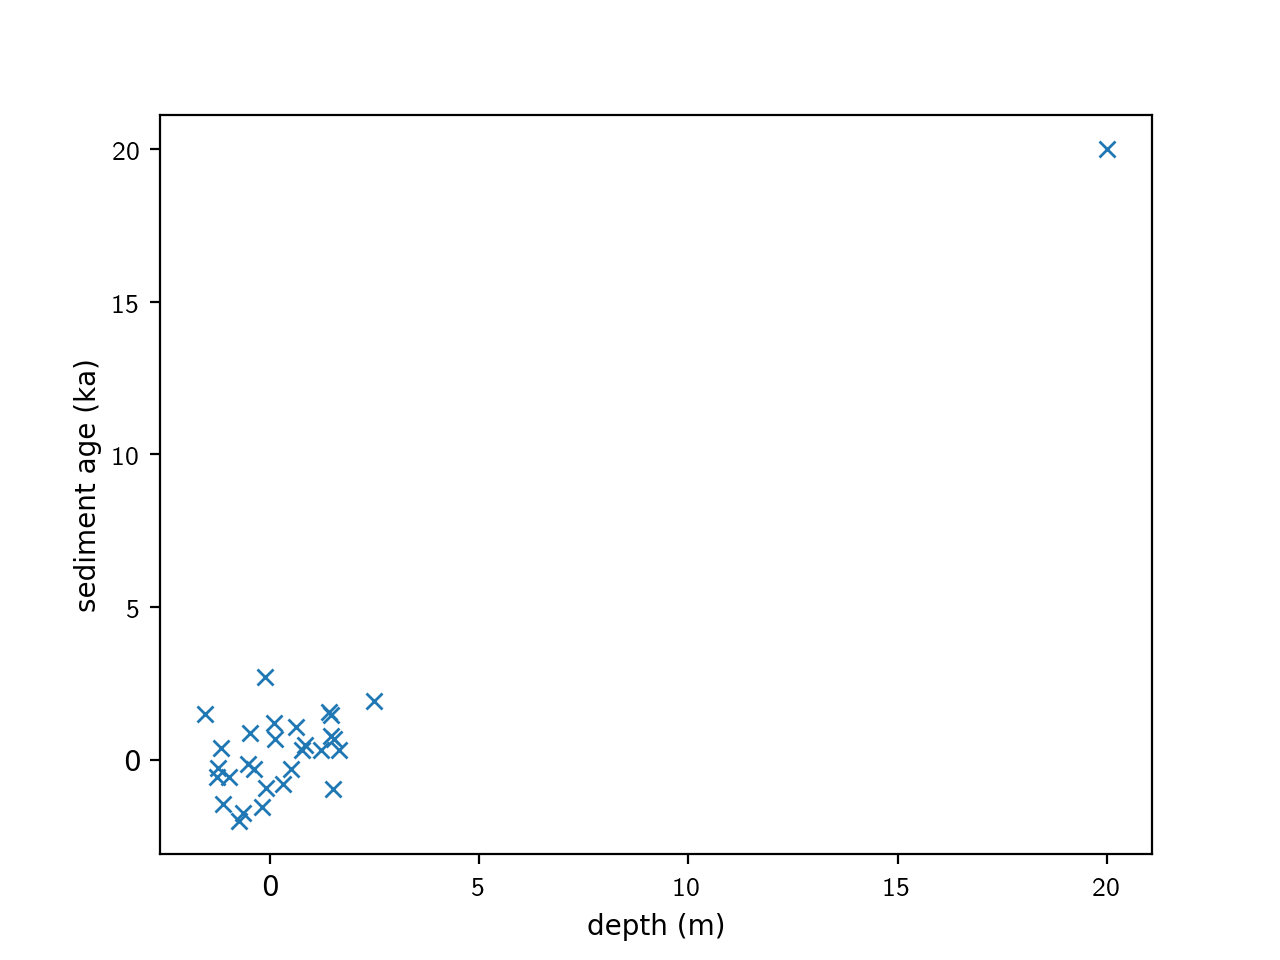

In [12]:
# Introduce outlier and plot:

depthR[-1] = 20
ageR[-1]   = 20

fig, ax = plt.subplots()
plt.plot(depthR,ageR,'x')
plt.xlabel('depth (m)')
plt.ylabel('sediment age (ka)');

Demonstrate method for dealing with outliers: calculate statistic  with subset of data

In [13]:
f = 0.85                                    # fraction of samples to include
k = np.round(f*N).astype(int)               # integer number of indices to exclude
N_random_indices = np.random.permutation(N) # generate random permutation of N indices
k_random_indices = N_random_indices[1:k]    # select first k random indices

In [14]:
np.corrcoef(ageR[k_random_indices],depthR[k_random_indices])

array([[1.        , 0.95154999],
       [0.95154999, 1.        ]])

Repeat the above example in a loop: 

In [15]:
f = 0.85                                    # fraction of samples to include
k = np.round(f*N).astype(int)               # integer number of indices to exclude

<IPython.core.display.Javascript object>


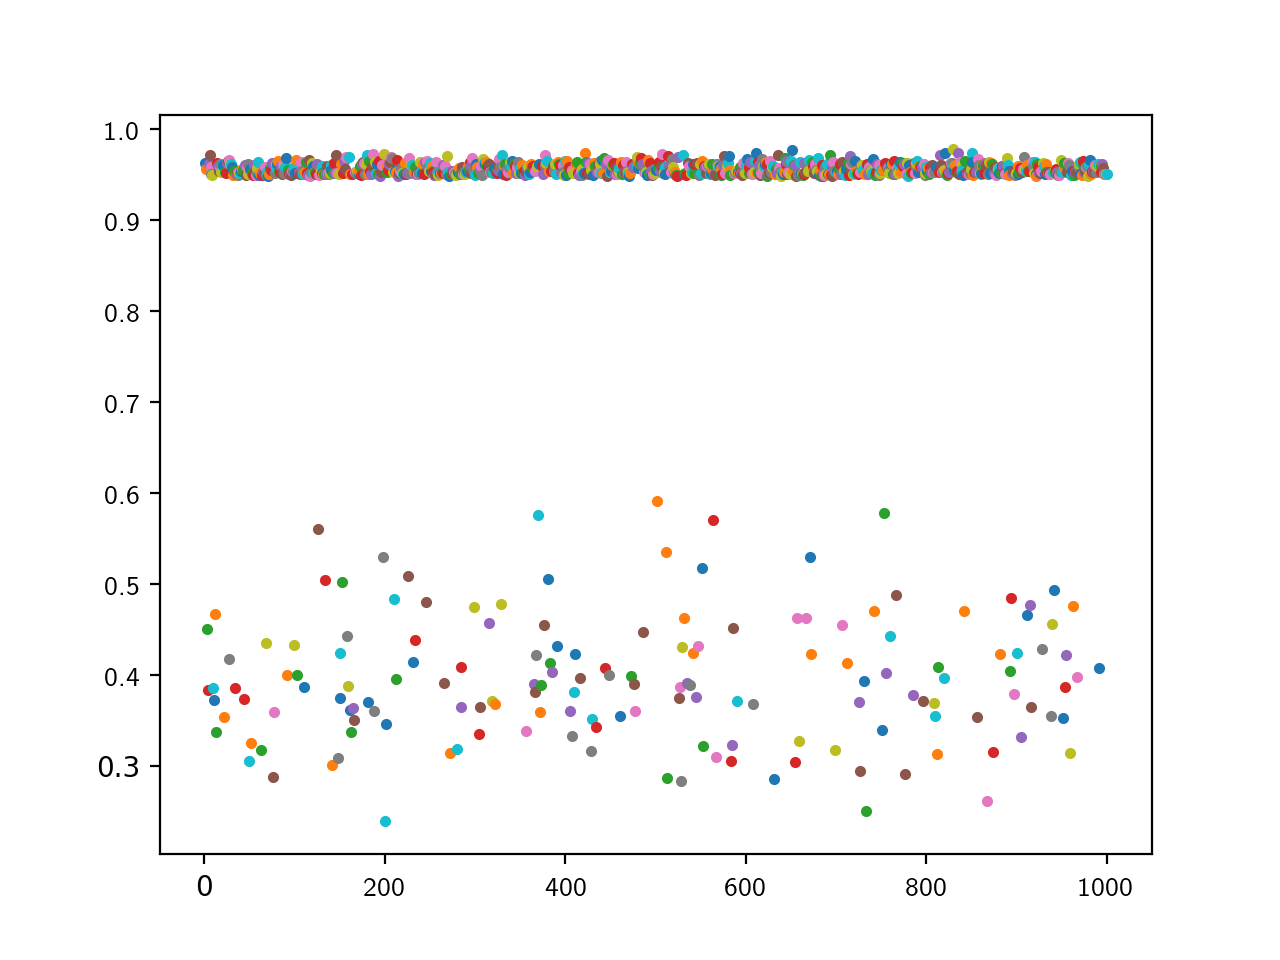

In [16]:
fig, ax = plt.subplots()

for i in range(1,1001):
    N_random_indices = np.random.permutation(N)
    k_random_indices = N_random_indices[1:k]
    r_da_random      = np.corrcoef(ageR[k_random_indices],depthR[k_random_indices])
    
    ax.plot(i,r_da_random[0,1],'.');

# Demo 2: linear regression 
back to age-depth data!

In [17]:
# Load age-depth data from sediment core

agedepth = np.loadtxt('agedepth.txt')

depth = agedepth[:,0]
age = agedepth[:,1]

In [18]:
dmean = np.mean(depth)
amean = np.mean(age)

print(dmean)
print(amean)

9.954359841999999
57.134176817343345


In [19]:
dstd = np.std(depth,ddof=1)
astd = np.std(age,ddof=1)

N = age.shape[0]

print(dstd)
print(astd)

5.367299080622674
32.40062614601549


In [20]:
# Calculate linear regression coefficients by hand:

b1 = np.sum( (depth - dmean)*(age - amean) )/ np.sum((depth - dmean)**2)
b0 = amean - b1*dmean

print(b1)
print(b0)
print('')

# use numpy's 'polyfit' function to obtain regression coefficients
p = np.polyfit(depth,age,1)

print(p[0])
print(p[1])

5.639299834942709
0.9985570033924205

5.639299834942709
0.9985570033924182


<IPython.core.display.Javascript object>


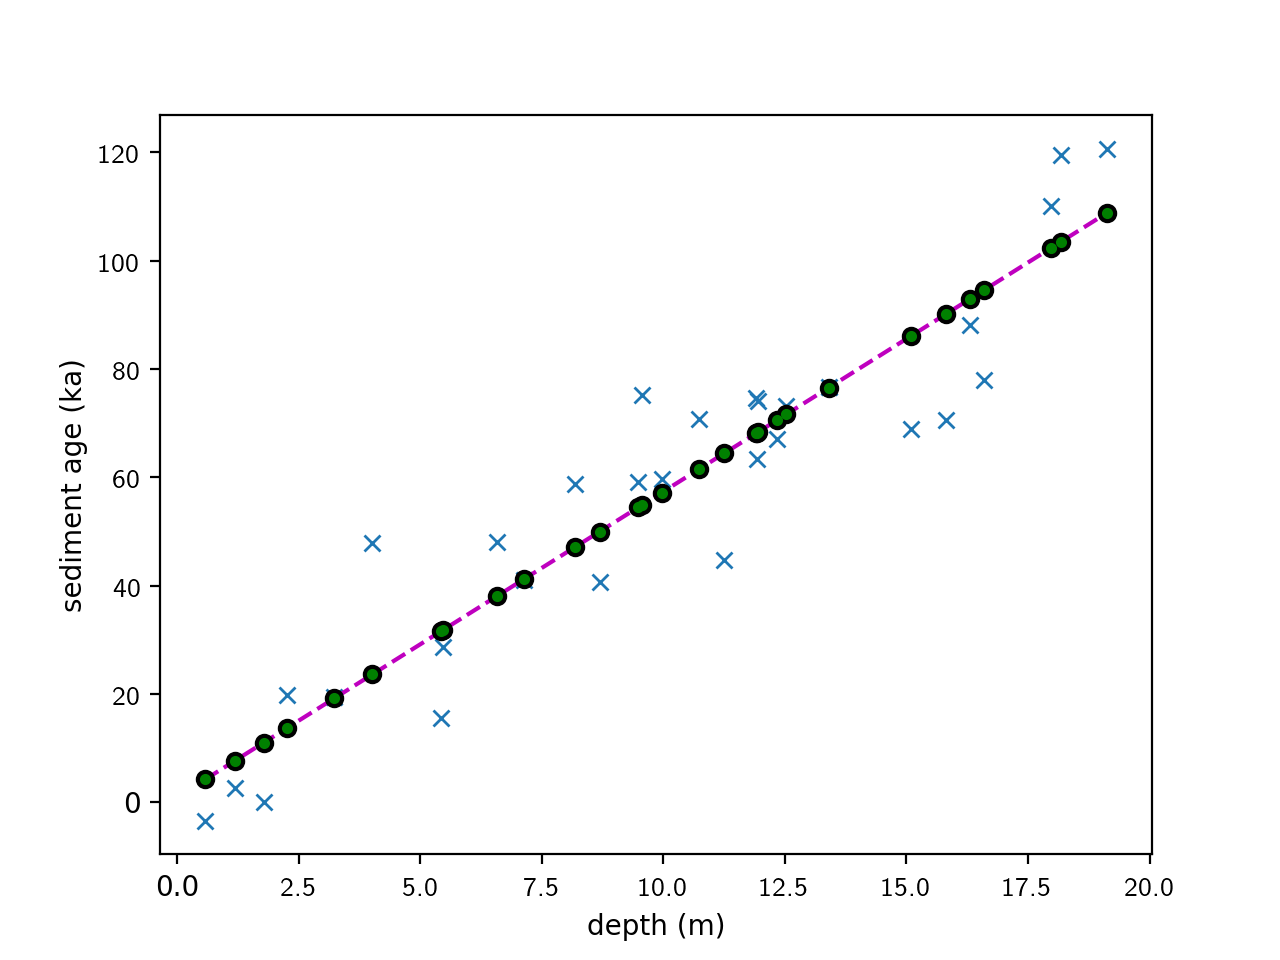

In [21]:
# Plot data and regressions using both methods above

fig, ax = plt.subplots()
ax.plot(depth,age, 'x')
ax.plot(depth, b1*depth + b0,'--m')
ax.plot(depth, p[0]*depth + p[1],'ko')
ax.plot(depth, np.polyval(p,depth), 'g.')

# np.polyval?

ax.set_ylabel('sediment age (ka)');
ax.set_xlabel('depth (m)');

### BONUS: Formation and solution of the normal equation  

$$ 
A^*Ax = A^*b\\
x = (A^*A)^{-1}A^*b
$$

In [22]:
# For the linear algebra keeners only:

# Create the matrix A
A   = np.vstack([depth**i for i in range(0,2)]).T
#Solve the normal equations
x_a = LA.inv(A.T @ A) @ np.dot(A.T,age)

print(x_a)

[0.998557   5.63929983]


SVD

In [23]:
# For fans of singular value decomposition (SVD):

U, S, Vh = LA.svd(A)
V = Vh.T
x_f = V @ LA.pinv(LA.diagsvd(S,depth.shape[0],2)) @ np.dot(U.T,age)

print(x_f)

[0.998557   5.63929983]


# Demo 3: Analysis of Variance 

In [24]:
# Copy depth-age data as x and y

x = depth.copy() 
y = age.copy()
yhat = b0 + b1*depth

<IPython.core.display.Javascript object>


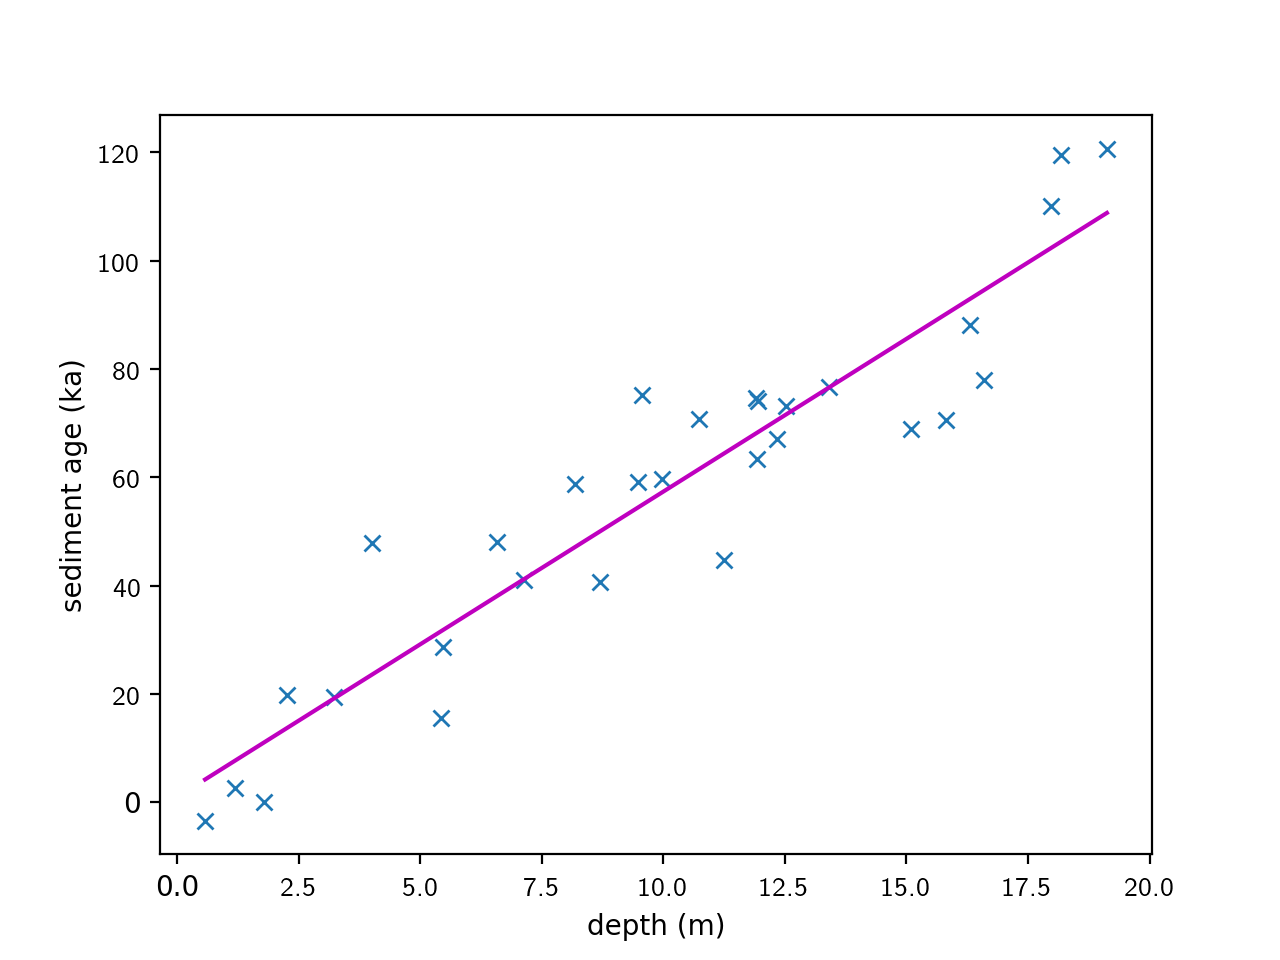

In [25]:
# Graphical difference between observed and predicted y

fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.plot(x, yhat,'m')

ax.set_ylabel('sediment age (ka)');
ax.set_xlabel('depth (m)');

<IPython.core.display.Javascript object>


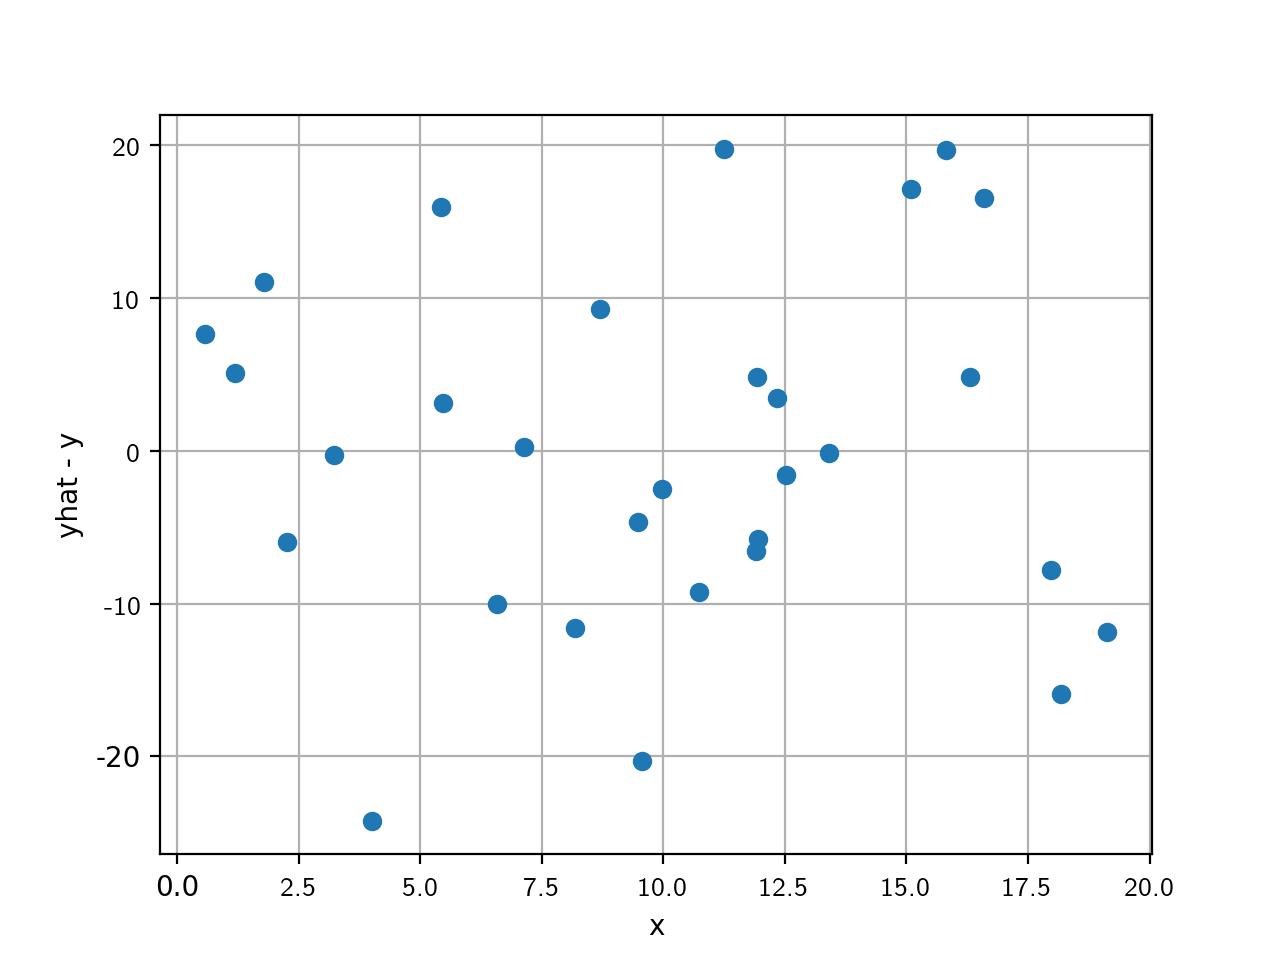

In [26]:
# Graphical residual:  

fig, ax = plt.subplots()
ax.plot(x,yhat-y,'o')
ax.grid()

ax.set_xlabel('x')
ax.set_ylabel('yhat - y');

<IPython.core.display.Javascript object>


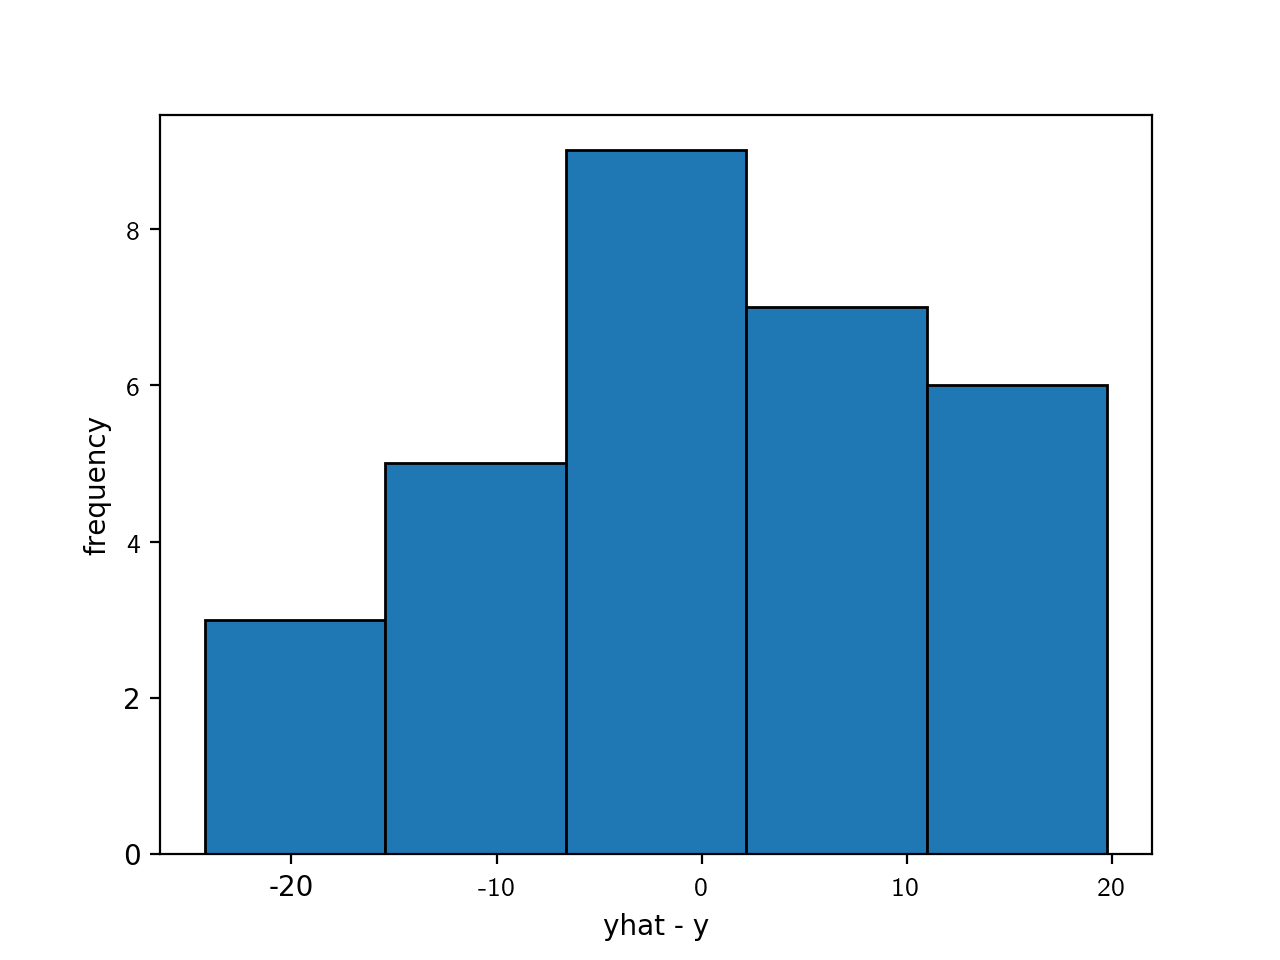

In [27]:
# Plot the distribution of residuals

N = x.shape[0]
nbin = np.sqrt(N).astype(int)

fig, ax = plt.subplots()
ax.hist(yhat-y,nbin,edgecolor='k');
ax.set_xlabel('yhat - y');
ax.set_ylabel('frequency');

In [28]:
# Sum of squares:  

# Error sum of squares SSE
SSE = np.sum((yhat - y)**2) 
print('SSE     : {:.3f}'.format(SSE))

# Total sum of squares
SST = np.sum(y**2) - (1/N)*(np.sum(y))**2
print('SST     : {:.3f}'.format(SST))

# Sum of squares due to regression
SSR = np.sum(yhat**2) - (1/N)*(np.sum(yhat))**2
print('SSR     : {:.3f}'.format(SSR))

print('SST-SSR : {:.3f}'.format(SST-SSR)) # Test: SSE = SST-SSR?

SSE     : 3876.149
SST     : 30444.217
SSR     : 26568.067
SST-SSR : 3876.149


In [29]:
# Mean squares:

MSR = SSR/1
print('MSR     : {:.3f}'.format(MSR))

MSE = SSE/(N-2)
print('MSE     : {:.3f}'.format(MSE))

MSR     : 26568.067
MSE     : 138.434


In [30]:
#Show that SST/(N-1) is the same as the variance of y:

print(SST/(N-1))
print(np.var(y,ddof=1))
   
# Remember, if we use the default argument of DOF=0, these values won't agree:
print('')
print(SST/(N-1))
print(np.var(y))

# Same result here:
print('')
print(SST/(N-1))
print(y.var())

# But
print('')
print(SST/N)
print(y.var())

1049.8005746538613
1049.8005746538624

1049.8005746538613
1014.8072221654004

1049.8005746538613
1014.8072221654004

1014.8072221653991
1014.8072221654004


In [31]:
# Test significance of fit with F-test: (is it better than the mean?)

F = MSR/MSE  # Calculate F statistic
print('Fobs  = {:.3f}'.format(F))

alpha = 0.05 # Set significance level
Fcrit = sts.f.isf(alpha,1,N-2)  # Look up critical value of F given alpha and DOFs

print('Fcrit = {:.3f}'.format(Fcrit))

Fobs  = 191.919
Fcrit = 4.196


In [32]:
# Multiple correlation coefficient:

Rsquared = SSR/SST  
print('R^2 = {:.3f}'.format(Rsquared))

R = np.sqrt(Rsquared)
  
print('R   = {:.3f}'.format(R))


# Demonstrate that this is the same as previous correlation coefficient

r = (1/(N-1))*(1/np.std(y,ddof=1))*(1/np.std(yhat,ddof=1))*sum( (yhat - np.mean(yhat)) *(y - np.mean(y)) )

print('r   = {:.3f}'.format(r))

R^2 = 0.873
R   = 0.934
r   = 0.934


# Demo 4: Cross validation

<IPython.core.display.Javascript object>


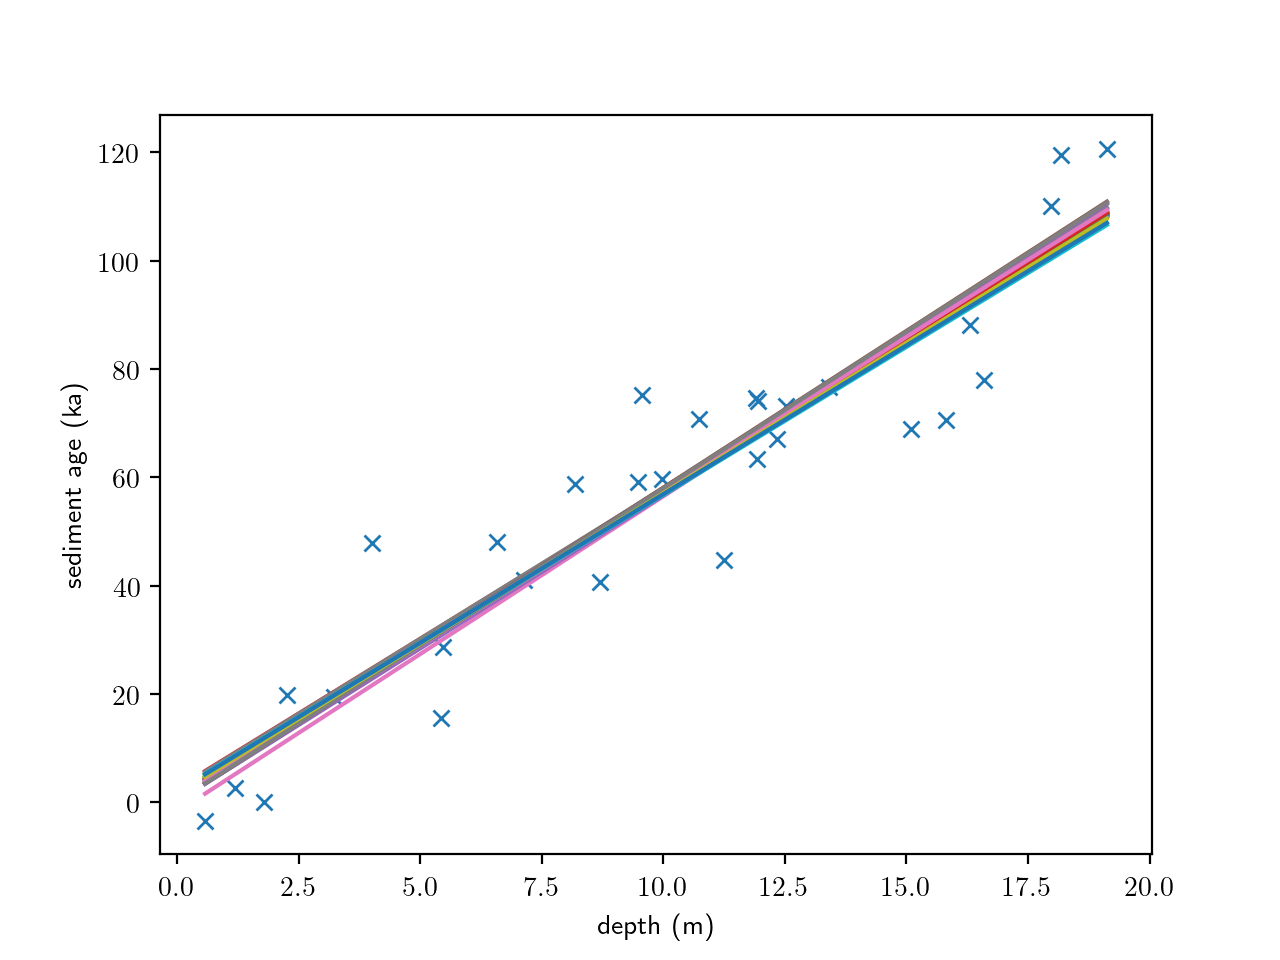

0.012230375544067347
12.219948796148913


<IPython.core.display.Javascript object>


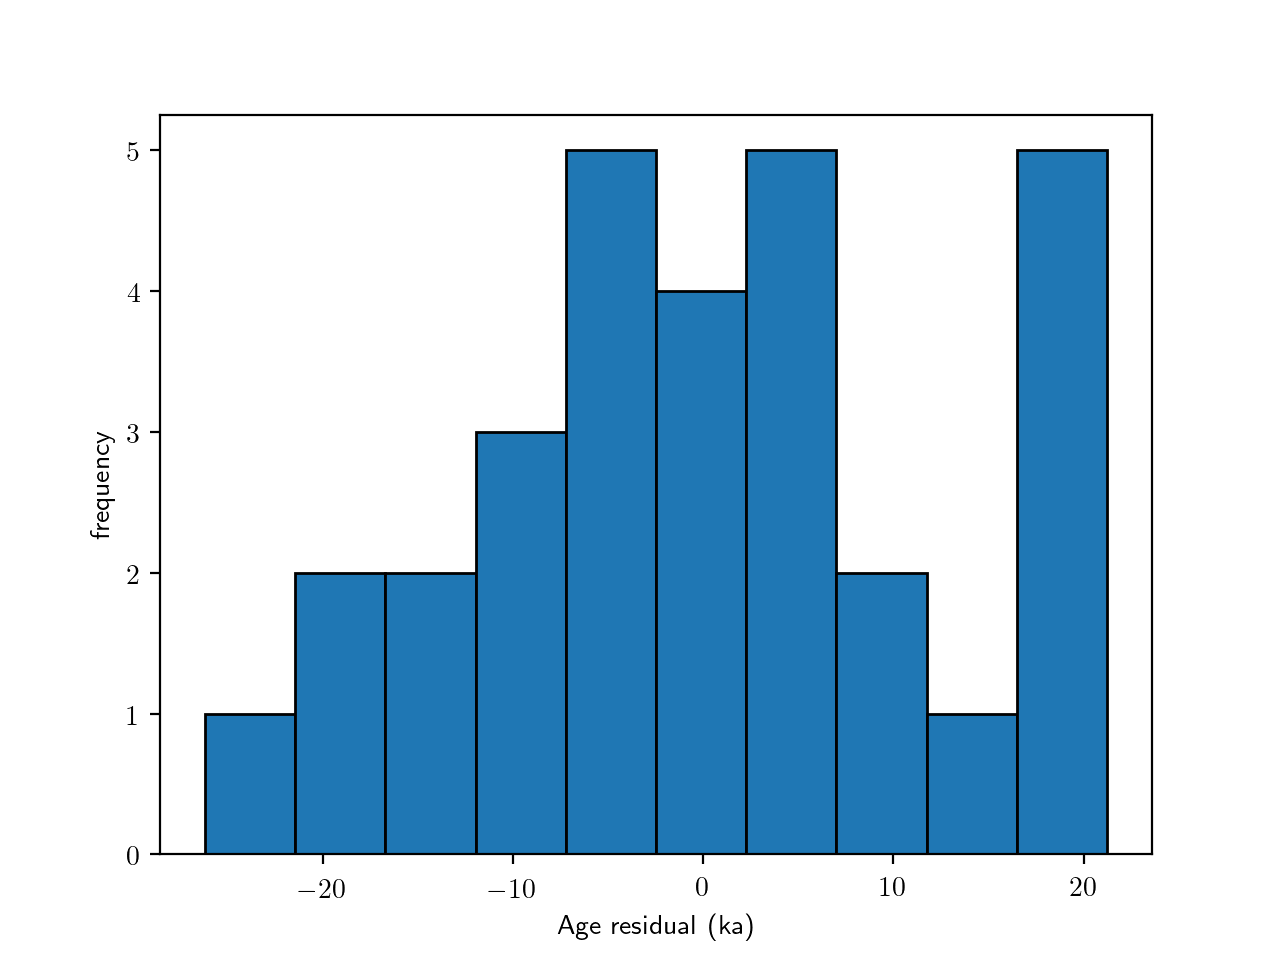

In [38]:
# Calculate depth-age data and regression lines using cross-validation

fig, ax = plt.subplots()
ax.plot(depth,age, 'x')
ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

coefs   = np.zeros((N,2))
p_age   = np.zeros(N)
p_error = np.zeros(N)
for i in range(N):
    j_depth = depth.copy()                      # copy depth vector
    j_age   = age.copy()                        # copy age vector
    j_depth = np.delete(j_depth,i)              # delete ith element of depth vector
    j_age   = np.delete(j_age,i)                # delete ith element of age vector
    coefs[i,:] = np.polyfit(j_depth,j_age,1)    # linear fit to reduced depth-age date
    ax.plot(depth,np.polyval(coefs[i,:],depth)) # plot regression line
    
    p_age[i]   = np.polyval(coefs[i,:],depth[i])
    p_error[i] = p_age[i] - age[i]
    
print(np.mean(p_error))    
print(np.std(p_error))

fig, ax = plt.subplots()
ax.hist(p_error,edgecolor='k')
ax.set_xlabel('Age residual (ka)');
ax.set_ylabel('frequency');

## Animate the cross-validation 

<IPython.core.display.Javascript object>


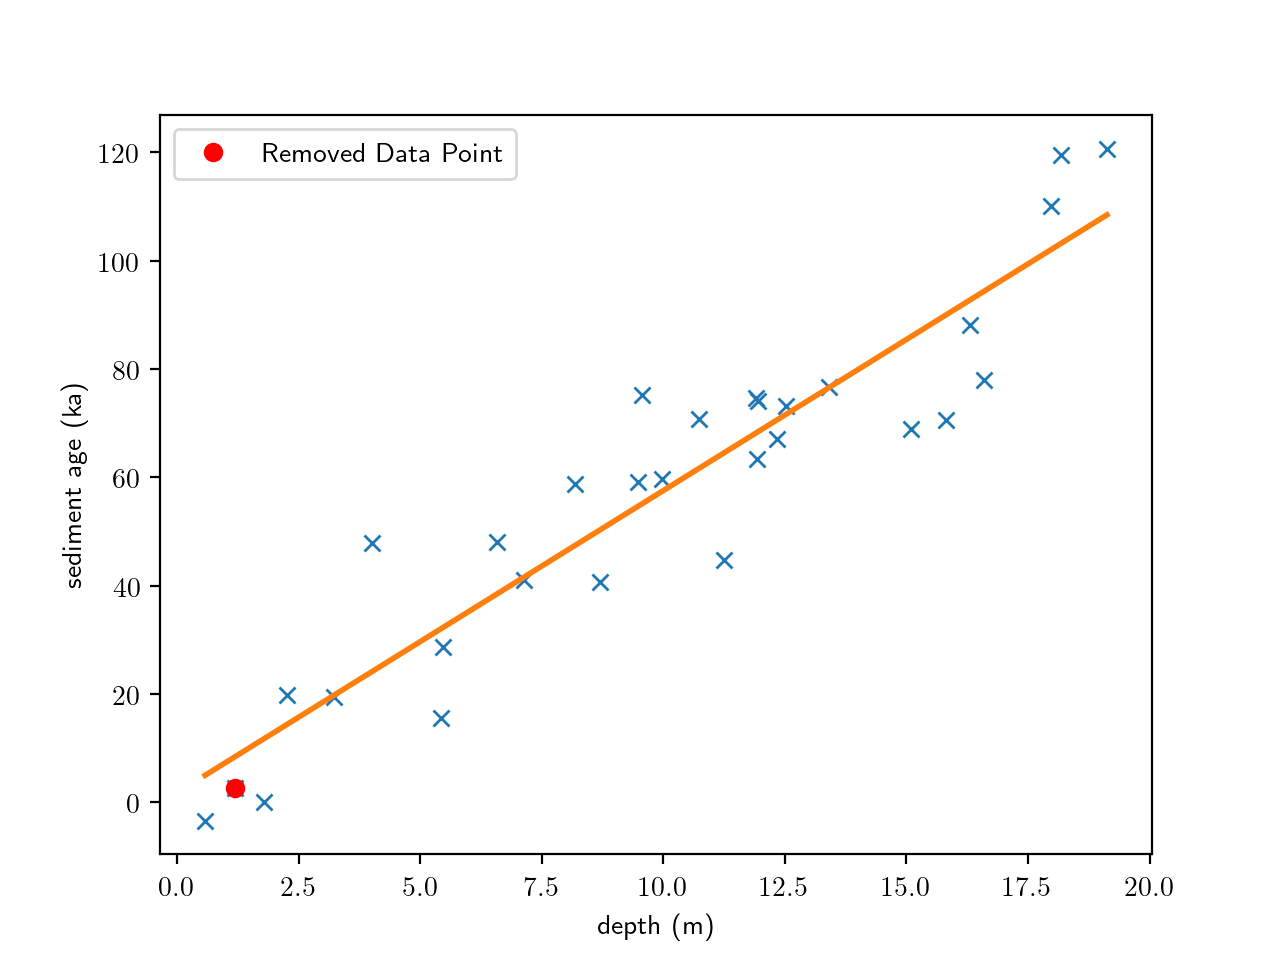

In [39]:
from matplotlib import animation, rc
#rc('animation', html='jshtml')


fig, ax = plt.subplots()
ax.plot(depth,age, 'x')
ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

line1, = ax.plot([], [], lw=2)
line2, = ax.plot([],[] ,marker='o',ls='None', color='r',label='Removed Data Point')
lines = [line1,line2]

ax.legend(loc=2)
def animate(i):  
    global depth,coefs
    lines[0].set_data(depth, np.polyval(coefs[i,:],depth))
    lines[1].set_data(depth[i],age[i])
    return lines

anim = animation.FuncAnimation(fig, animate, 
                               frames=range(0,N), interval=200, blit=True)
anim

# Demo 5: Reduced major axis regression 

In [35]:
# Calculate coeffcients for reduced major axis regression

p = np.polyfit(depth,age,1)

b1_RMA = astd/dstd
b0_RMA = amean - b1*dmean

<IPython.core.display.Javascript object>


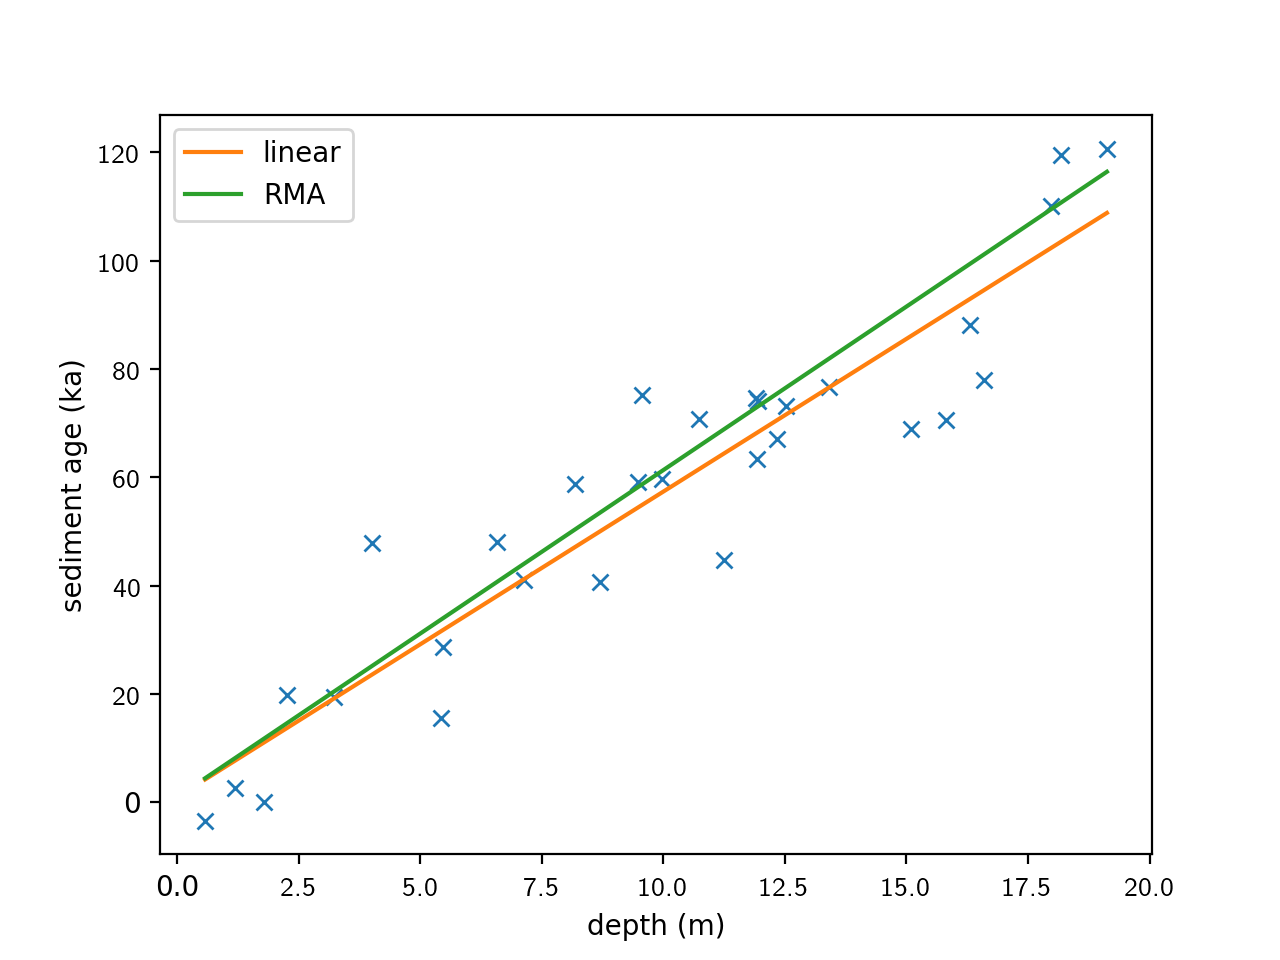

In [36]:
# Plot data, ordinary linear regression, reduced major axis regression together

fig, ax = plt.subplots()

ax.plot(depth,age, 'x')
ax.plot(depth,np.polyval(p,depth), label='linear')
ax.plot(depth,b0_RMA + b1_RMA*depth, label='RMA')

ax.set_ylabel('sediment age (ka)');
ax.set_xlabel('depth (m)');

ax.legend();

# Demo 6: Polynomial regression

<IPython.core.display.Javascript object>


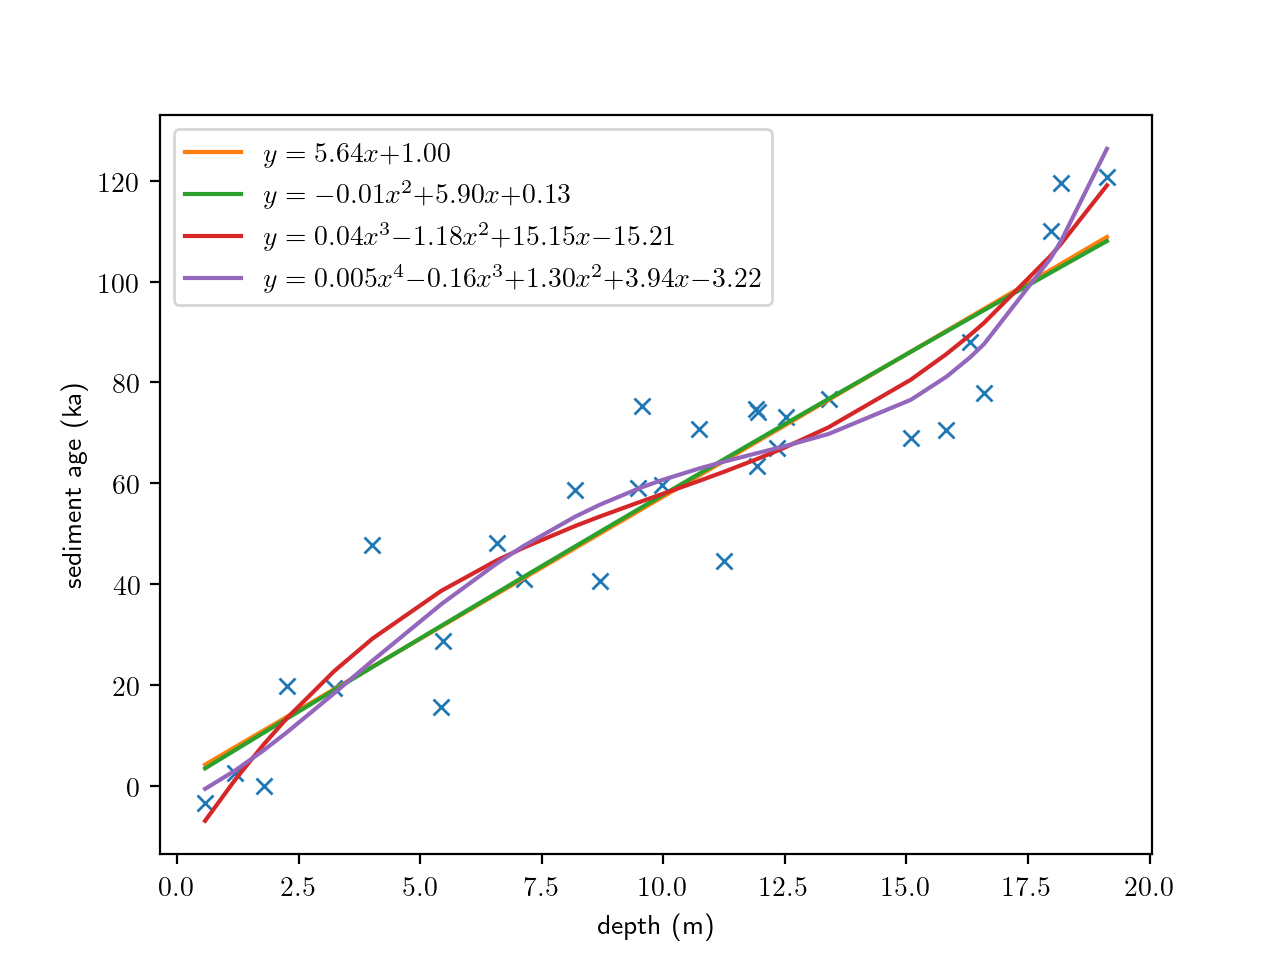

In [37]:
# Use polyfit to perform polynomial regression

plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()
ax.plot(depth,age, 'x')

# np.polyfit?

p = np.polyfit(depth,age,1)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.2f}}}x {{{:+.2f}}}$'.format(*p))

p = np.polyfit(depth,age,2)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.2f}}}x^2 {{{:+.2f}}}x {{{:+.2f}}}$'.format(*p))

p = np.polyfit(depth,age,3)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.2f}}}x^3 {{{:+.2f}}}x^2 {{{:+.2f}}}x {{{:+.2f}}}$'.format(*p))

p = np.polyfit(depth,age,4)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.3f}}}x^4 {{{:+.2f}}}x^3 {{{:+.2f}}}x^2 {{{:+.2f}}}x {{{:+.2f}}}$'.format(*p))

ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

ax.legend();